### 워드클라우드 만들기

#### 해시태그 데이터 불러오기

In [1]:
import pandas as pd

raw_total = pd.read_excel('crawling_data/crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집', '#갈치왕', '#제주도맛집베스트', '#제주도맛집추천', '#...
1    ['#제주도맛집', '#중문', '#제주중문맛집', '#제주도갈치조림', '#제주도...
2    ['#제주도여행', '#성산일출봉맛집이건', '#흑돼지박스성산점👉성산읍', '#섭지...
Name: tags, dtype: object

In [2]:
raw_total['tags'][1]

"['#제주도맛집', '#중문', '#제주중문맛집', '#제주도갈치조림', '#제주도맛집추천', '#제주도그램', '#중문갈치조림맛집', '#제주도중문맛집', '#제주도갈치맛집', '#제주통갈치조림맛집']"

In [3]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

#### 해시태그 출현 빈도 집계

In [4]:
from collections import Counter

## 그룹 내 원소의 종류별로 빈도수를 집계가능
tag_counts = Counter(tags_total)

## 그 중 상위 50개 해시태그 확인
tag_counts.most_common(50)

[('#제주맛집', 110),
 ('#제주도맛집', 108),
 ('#제주여행', 65),
 ('', 56),
 ('#애월맛집', 43),
 ('#제주도여행', 42),
 ('#서귀포맛집', 38),
 ('#제주', 32),
 ('#제주도', 32),
 ('#제주공항근처맛집', 31),
 ('#성산맛집', 27),
 ('#협재맛집', 25),
 ('#제주도가볼만한곳', 24),
 ('#제주도맛집', 23),
 ('#제주맛집', 23),
 ('#제주맛집추천', 23),
 ('#성산일출봉맛집', 22),
 ('#제주도민맛집', 21),
 ('#제주시맛집', 21),
 ('#한림맛집', 21),
 ('#제주카페', 20),
 ('#월정리맛집', 20),
 ('#제주여행', 20),
 ('#제주핫플', 20),
 ('#jeju', 20),
 ('#월정리카페', 18),
 ('#제주도여행', 18),
 ('#제주갈치조림', 17),
 ('#제주도카페', 16),
 ('#애월카페', 16),
 ('#성산카페', 15),
 ('#제주통갈치구이', 15),
 ('#제주갈치조림맛집', 15),
 ('#제주흑돼지맛집', 15),
 ('#서귀포맛집', 14),
 ('#통갈치구이', 14),
 ('#제주도', 14),
 ('#제주공항맛집', 13),
 ('#제주도맛집추천', 12),
 ('#제주성산맛집', 12),
 ('#동문시장맛집', 12),
 ('#아쿠아플라넷제주', 12),
 ('#함덕맛집', 11),
 ('#애월맛집', 11),
 ('#먹스타그램', 11),
 ('#제주', 11),
 ('#제주핫플레이스', 10),
 ('#제주살이', 10),
 ('#jejuisland', 10),
 ('#제주카페', 10)]

In [7]:
# 데이터 정제

stopwords = ['']

tag_total_selected = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 110),
 ('#제주도맛집', 108),
 ('#제주여행', 65),
 ('#애월맛집', 43),
 ('#제주도여행', 42),
 ('#서귀포맛집', 38),
 ('#제주', 32),
 ('#제주도', 32),
 ('#제주공항근처맛집', 31),
 ('#성산맛집', 27),
 ('#협재맛집', 25),
 ('#제주도가볼만한곳', 24),
 ('#제주도맛집', 23),
 ('#제주맛집', 23),
 ('#제주맛집추천', 23),
 ('#성산일출봉맛집', 22),
 ('#제주도민맛집', 21),
 ('#제주시맛집', 21),
 ('#한림맛집', 21),
 ('#제주카페', 20),
 ('#월정리맛집', 20),
 ('#제주여행', 20),
 ('#제주핫플', 20),
 ('#jeju', 20),
 ('#월정리카페', 18),
 ('#제주도여행', 18),
 ('#제주갈치조림', 17),
 ('#제주도카페', 16),
 ('#애월카페', 16),
 ('#성산카페', 15),
 ('#제주통갈치구이', 15),
 ('#제주갈치조림맛집', 15),
 ('#제주흑돼지맛집', 15),
 ('#서귀포맛집', 14),
 ('#통갈치구이', 14),
 ('#제주도', 14),
 ('#제주공항맛집', 13),
 ('#제주도맛집추천', 12),
 ('#제주성산맛집', 12),
 ('#동문시장맛집', 12),
 ('#아쿠아플라넷제주', 12),
 ('#함덕맛집', 11),
 ('#애월맛집', 11),
 ('#먹스타그램', 11),
 ('#제주', 11),
 ('#제주핫플레이스', 10),
 ('#제주살이', 10),
 ('#jejuisland', 10),
 ('#제주카페', 10),
 ('#제주술집', 10)]

#### 막대차트로 해시태그 살펴보기

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [9]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

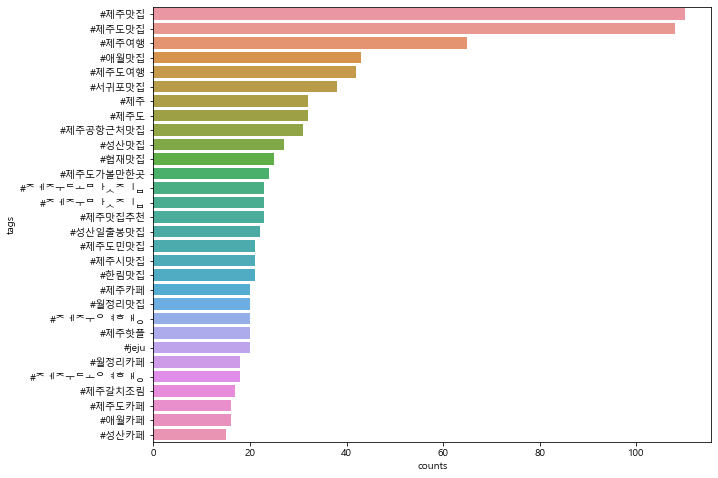

In [10]:
plt.figure(figsize = (10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [11]:
# 워드클라우드 라이브러리 불러오기

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'

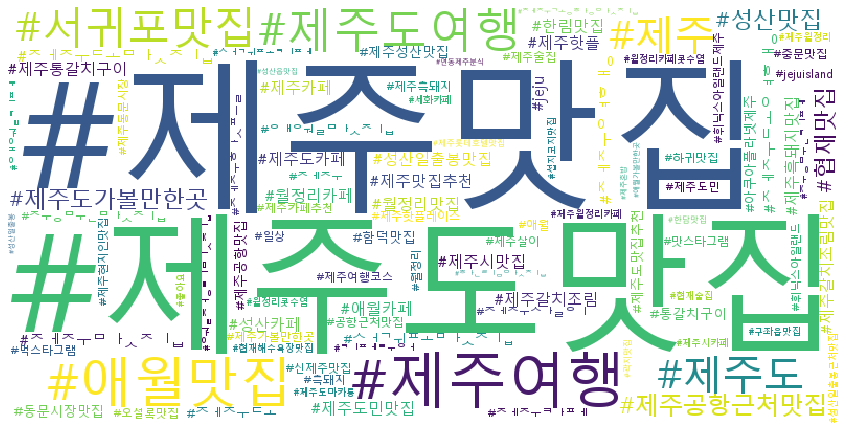

In [15]:
# 워드클라우드 생성

## font_path : 사용하고자 하는 글꼴의 경로
## background_color : 배경생
## max_words : 나타낼 최대 단어 수
## relative_scaling : 워드 클라우드 내 글자들의 상대적인 크기
##                     0에 가까울수록 빈도수의 순위에, 1에 가까울수록 빈도수에 더 큰 영향을 보임.
## 워드클라우드는 생성 시 마다 배치, 색상을 무작위로 하기 떄문에 적합한 그림이 나올때까지 반복실행
wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400)

wordcloud.generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')

## 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('tag_wordcloud.png')